In [1]:
import matplotlib.pylab as plt
%matplotlib inline

import pandas as pd
import numpy as np
from time import time
import sompy

In [59]:
numDim = 10

In [60]:
data = np.random.rand(50000,numDim)
# print data

In [61]:
mapsize = [20,20]

sm = sompy.SOMFactory().build(data, mapsize, 
#     mapshape='planar', 
#     lattice='rect', 
#     normalization = 'var', 
    initialization='pca', 
    neighborhood='gaussian', 
    training='batch')

sm.train(n_job=1, 
#          verbose=False, 
         verbose='info', 
         train_rough_len=10, 
         train_finetune_len=20
        )

 Training...
C:\Users\danil\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
 pca_linear_initialization took: 0.062000 seconds
 Rough training...
 radius_ini: 3.000000 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  0.457000, quantization error: 2.829744

 epoch: 2 ---> elapsed time:  0.443000, quantization error: 2.808036

 epoch: 3 ---> elapsed time:  0.459000, quantization error: 2.766768

 epoch: 4 ---> elapsed time:  0.437000, quantization error: 2.604920

 epoch: 5 ---> elapsed time:  0.437000, quantization error: 2.468332

 epoch: 6 ---> elapsed time:  0.453000, quantization error: 2.395645

 epoch: 7 ---> elapsed time:  0.436000, quantization err

In [62]:
topographic_error = sm.calculate_topographic_error()
quantization_error = np.mean(sm._bmu[1])
print "Topographic error = %s; Quantization error = %s" % (topographic_error, quantization_error)

Topographic error = 0.22826; Quantization error = 2.03488607814


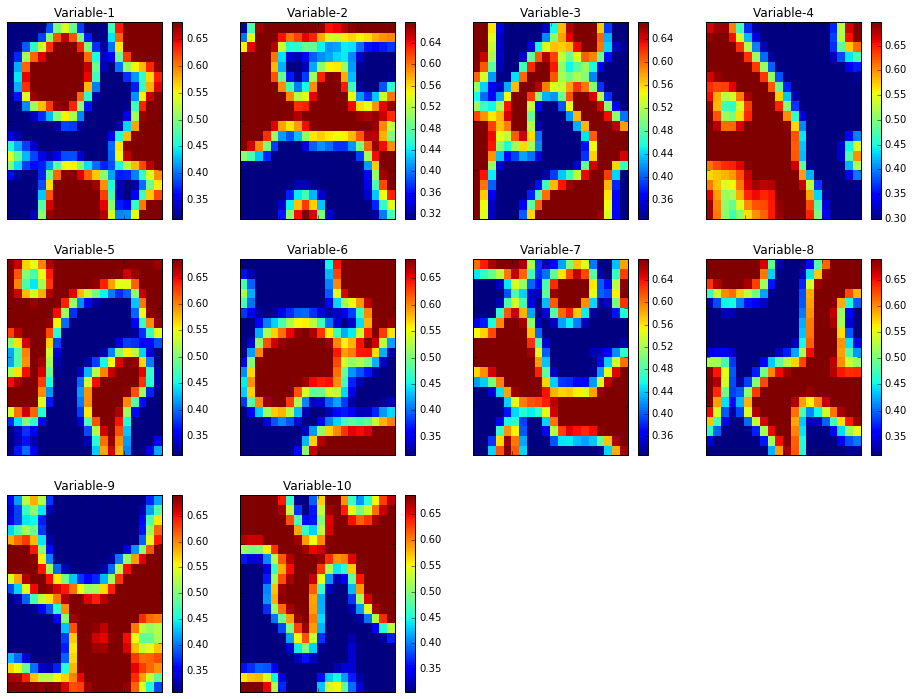

In [63]:
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"rand data",text_size=10)
view2D.show(sm, col_sz=4, which_dim="all", desnormalize=True)

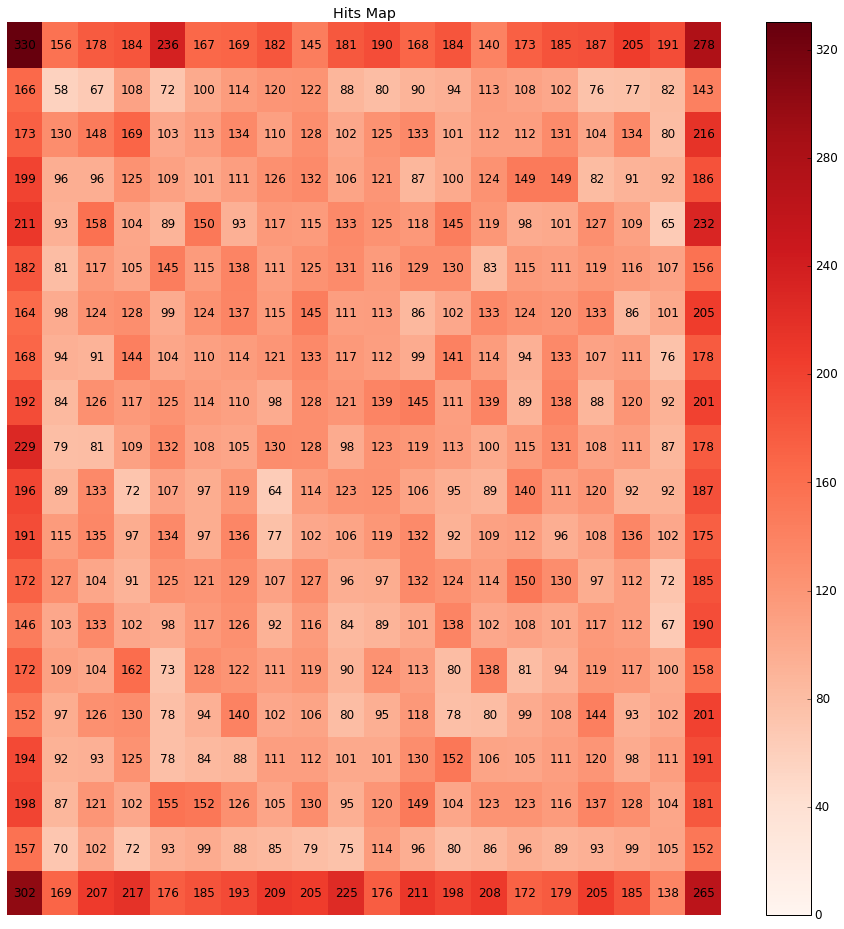

In [64]:
from sompy.visualization.bmuhits import BmuHitsView

vhts  = BmuHitsView(4,4,"Hits Map",text_size=12)
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=12, cmap="Reds", logaritmic=False)

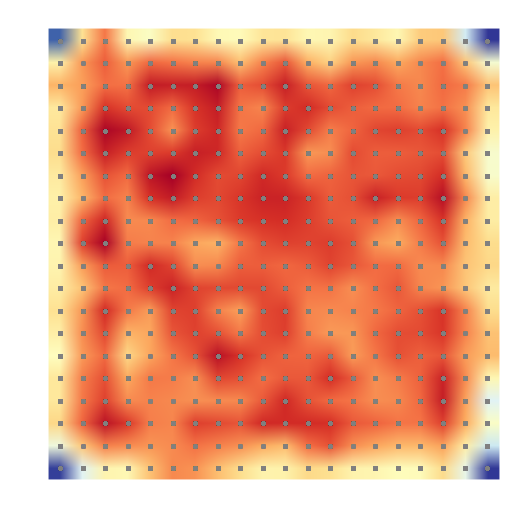

In [65]:
#But Umatrix finds the clusters easily

u = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(sm, distance=1, row_normalized=False)

UMAT = u.show(sm, distance2=1, row_normalized=False, show_data=True, contooor=False, blob=False)



(0, 20)

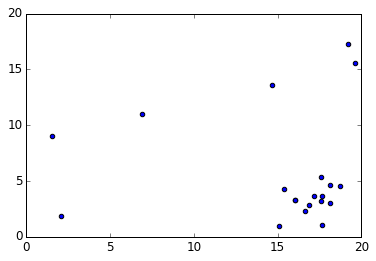

In [109]:
import math
from matplotlib import pyplot

spread = .4
base = 0.4

data2 = (np.random.rand(20,numDim) - .5) * spread + base

a = sm.project_data(data2).tolist()

x = [math.floor(float(i)/20) + np.random.rand() for i in a]
y = [float(i) % 20 + np.random.rand() for i in a]

pyplot.scatter(x, y)
pyplot.xlim(0, 20)
pyplot.ylim(0, 20)